In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, probplot
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


In [38]:
raw_data_file = os.path.join(os.getcwd(), '..', 'data','raw','raw.csv')
df = pd.read_csv(raw_data_file)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [39]:
data = df.iloc[:, 1:]
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [40]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')
print(f'The dataset has {data.isna().sum().sum()} null values.')
print(f'The dataset has {data.duplicated().sum()} duplicate rows.')

The dataset has 300153 rows and 11 columns.
The dataset has 0 null values.
The dataset has 0 duplicate rows.


In [41]:
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [42]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


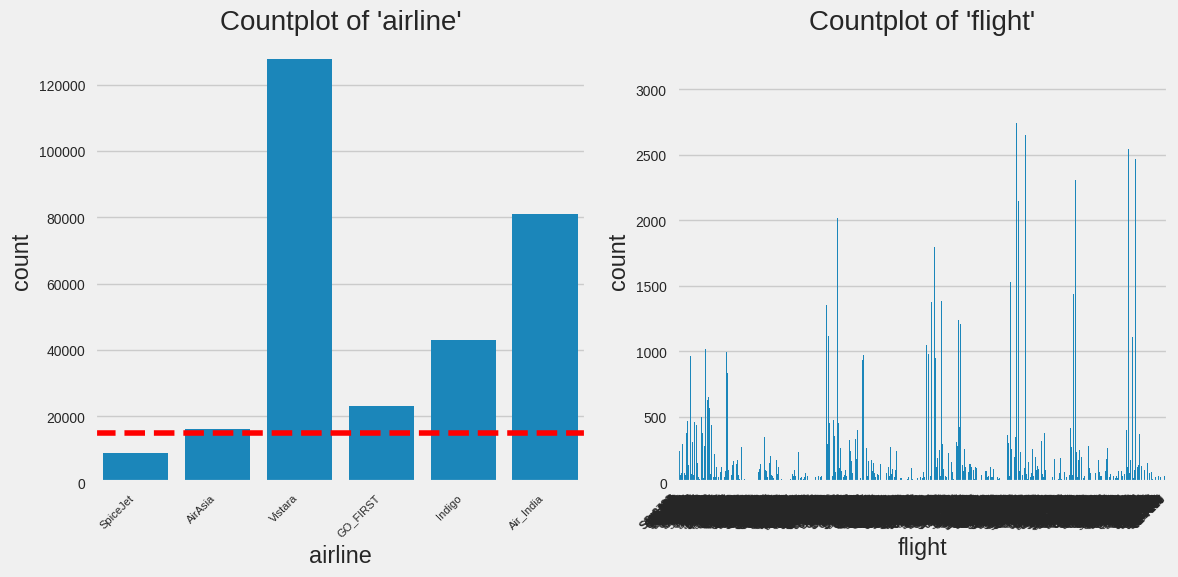

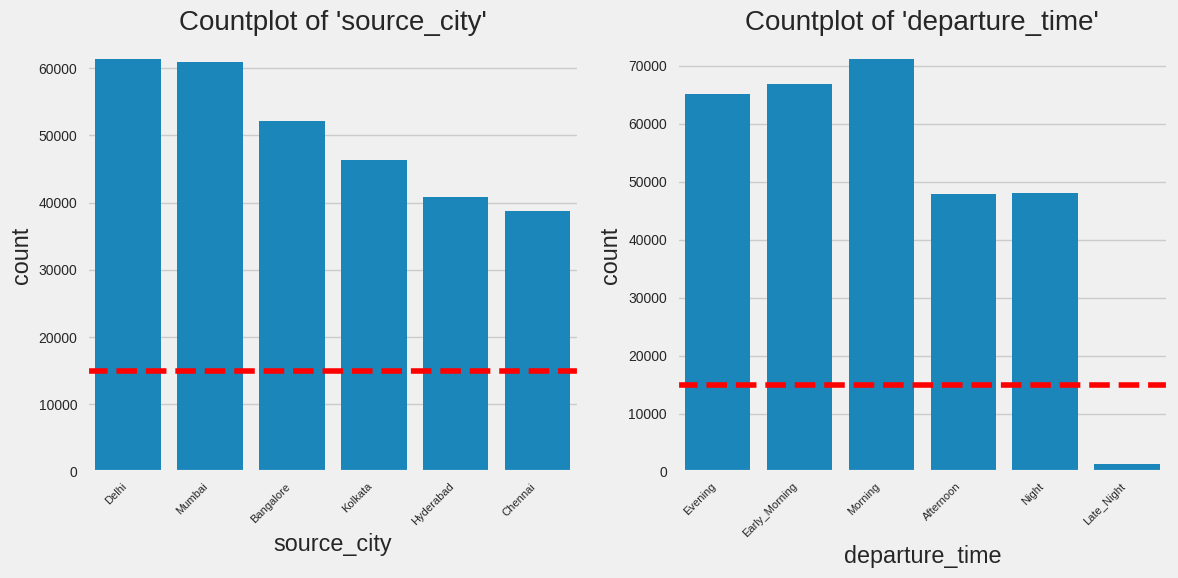

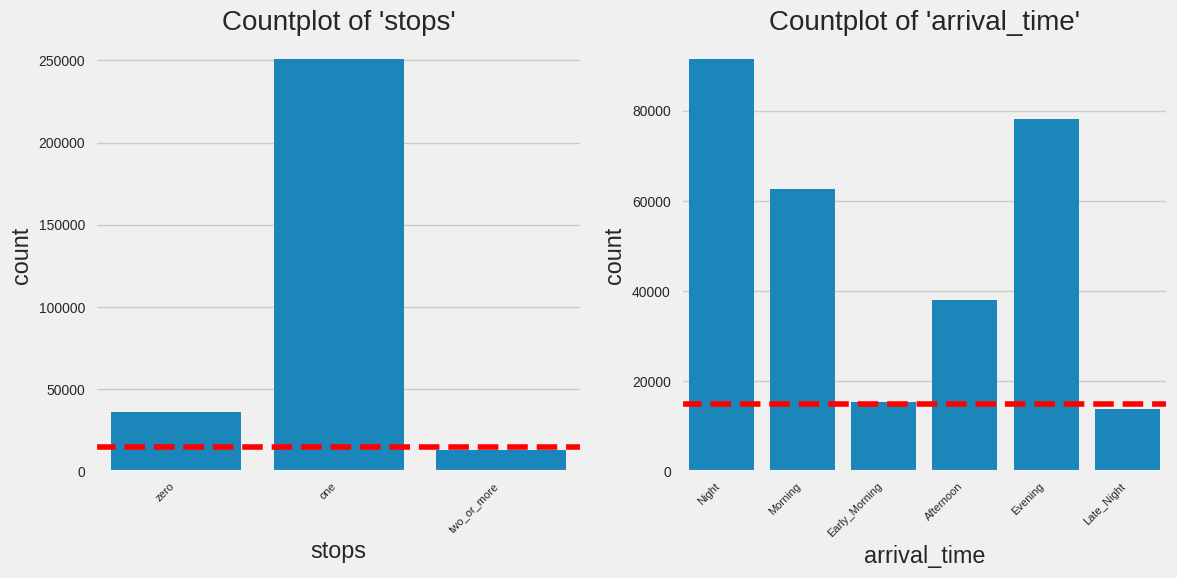

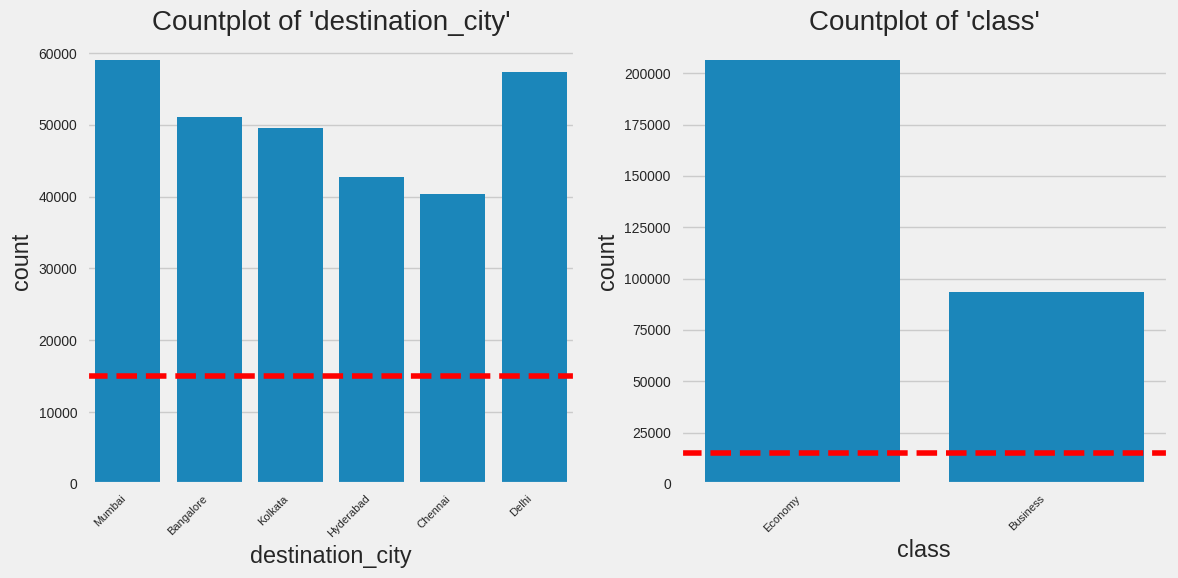

In [43]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
five_percent = len(data) * 0.05

n_pairs = len(cat_cols) // 2

for i in range(n_pairs):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

    sns.countplot(x=data[cat_cols[i*2]], ax=ax1)
    ax1.axhline(five_percent, ls='--', color='red')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax1.set_title(f"Countplot of '{cat_cols[i*2]}'", size=20)

    sns.countplot(x=data[cat_cols[i*2+1]], ax=ax2)
    if i != 0:
        ax2.axhline(five_percent, ls='--', color='red')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax2.set_title(f"Countplot of '{cat_cols[i*2+1]}'", size=20)

    plt.tight_layout()
    plt.show()

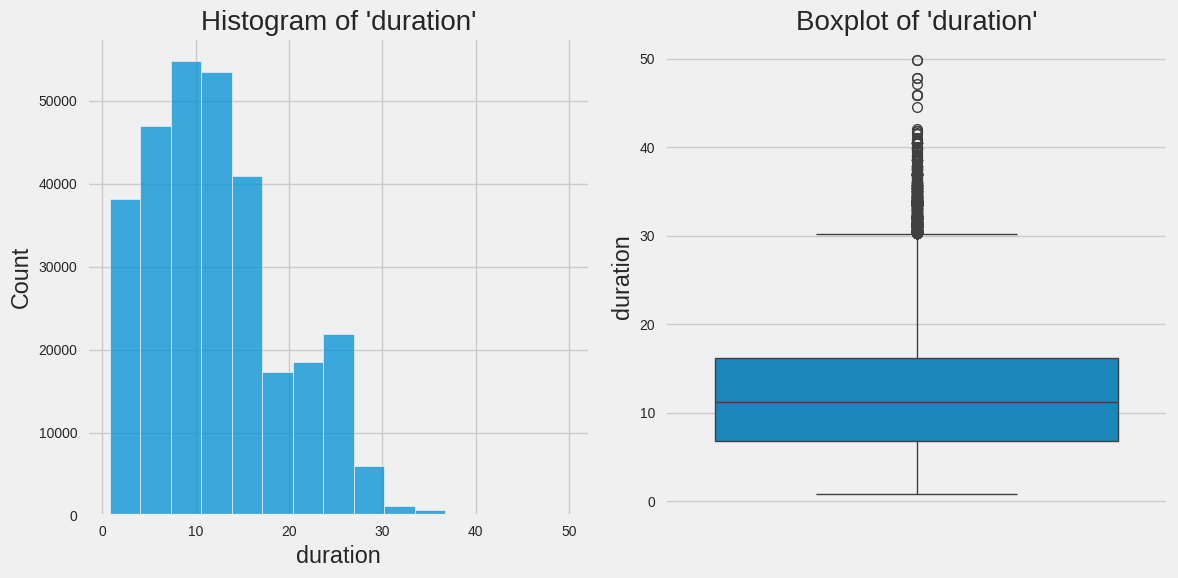

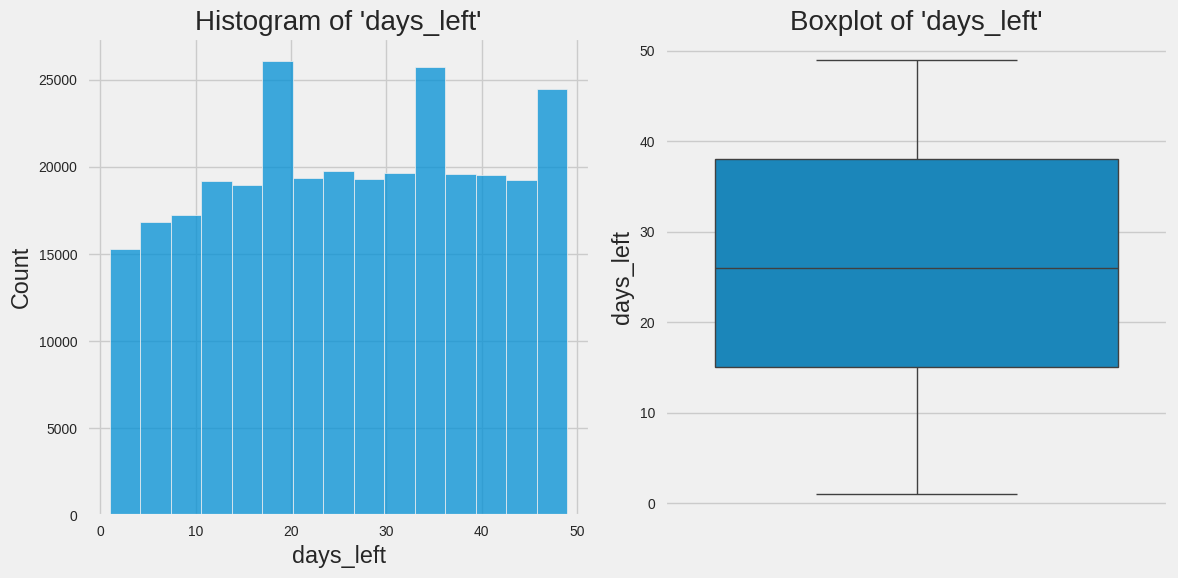

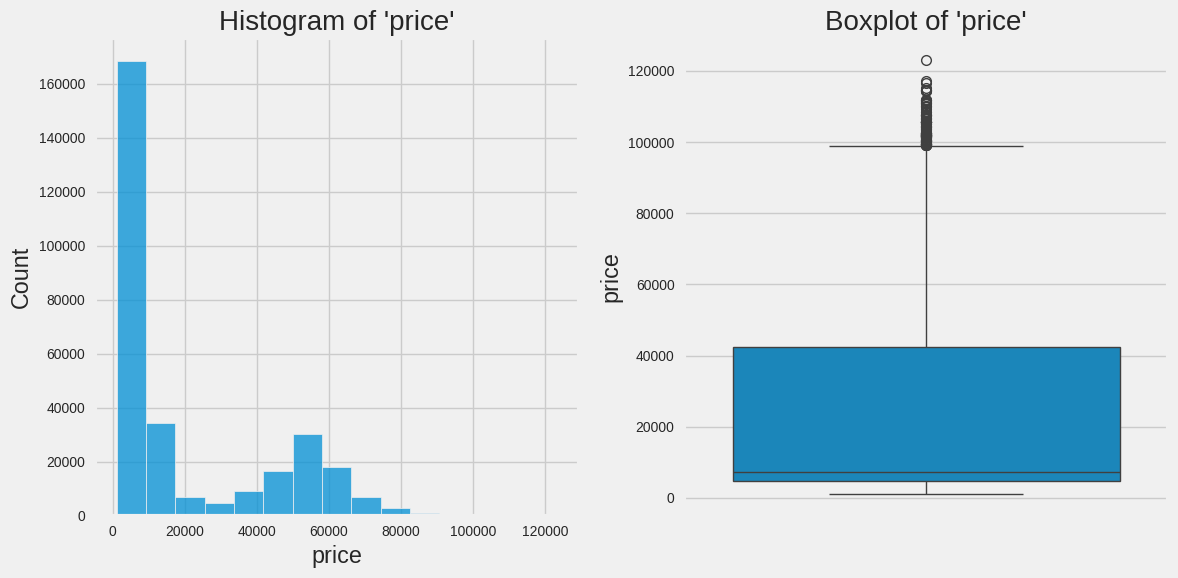

In [44]:
num_cols = [col for col in data.columns if data[col].dtypes != 'O']


for i in range(3):

    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

    ax1 = sns.histplot(data[num_cols[i]], bins=15, ax=ax1)
    ax1.set_title(f"Histogram of '{num_cols[i]}'", size=20)

    ax2 = sns.boxplot(data[num_cols[i]], ax=ax2)
    ax2.set_title(f"Boxplot of '{num_cols[i]}'", size=20)
    
    plt.tight_layout()

In [45]:
outliers_perc = []

print('### Percentage of outliers in the columns ###')
print()


def outliers_perc_search(data, cols):
    for k,v in data[cols].items():
        if data[k].dtype != 'O':
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (k,int(perc))
            outliers_perc.append(out_tuple)
            print("Column %s outliers = %.1f%%" % (k,perc))


outliers_perc_search(data, num_cols)

### Percentage of outliers in the columns ###

Column duration outliers = 0.7%
Column days_left outliers = 0.0%
Column price outliers = 0.0%


<Figure size 1200x600 with 0 Axes>

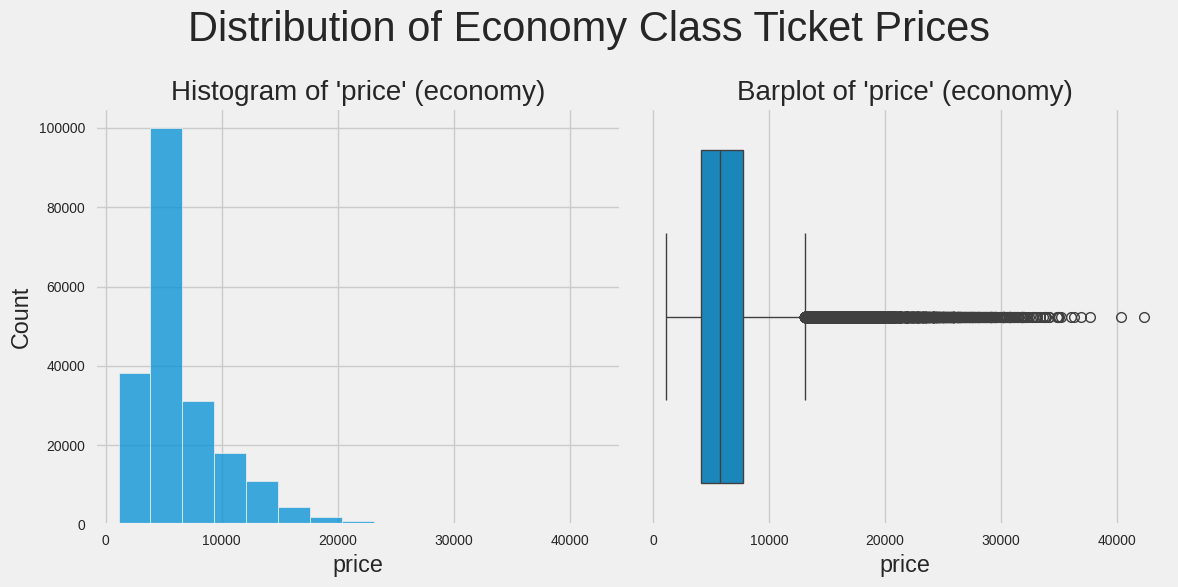

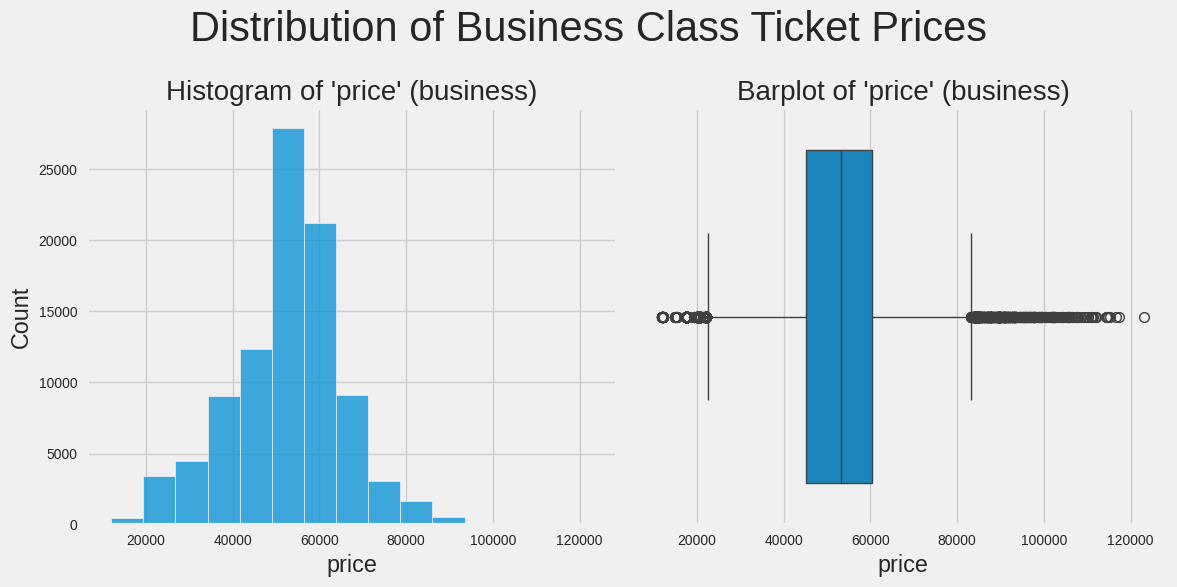

In [46]:
bigfig = plt.figure(figsize=(12,6))

(top,bottom) = bigfig.subfigures(2,1)

top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data[data['class'] == 'Economy'], x='price', bins=15, ax=ax1)
ax1.set_title("Histogram of 'price' (economy)", size=20)

ax2 = sns.boxplot(data=data[data['class'] == 'Economy'], x='price', ax=ax2)
ax2.set_title("Barplot of 'price' (economy)", size=20)

plt.suptitle('Distribution of Economy Class Ticket Prices', size=30)

plt.tight_layout()

bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data[data['class'] == 'Business'], x='price', bins=15, ax=ax1)
ax1.set_title("Histogram of 'price' (business)", size=20)

ax2 = sns.boxplot(data=data[data['class'] == 'Business'], x='price', ax=ax2)
ax2.set_title("Barplot of 'price' (business)", size=20)

plt.suptitle('Distribution of Business Class Ticket Prices', size=30)

plt.tight_layout()

In [47]:
outliers_perc = []

for cat in ['Economy','Business']:
    print(f'{cat} distribution')
    outliers_perc_search(data[data['class'] == cat], ['price'])
    print()

Economy distribution
Column price outliers = 6.7%

Business distribution
Column price outliers = 3.9%



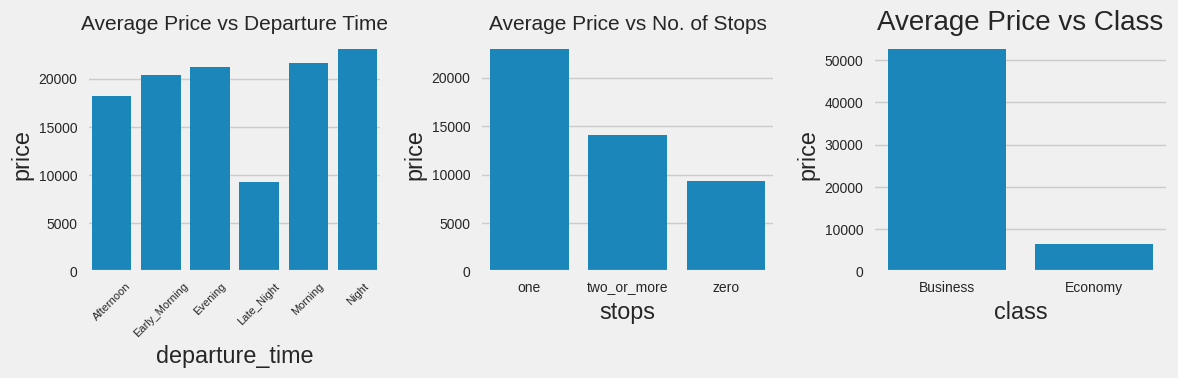

In [48]:
mean_price_departure = data.groupby('departure_time')['price'].mean().reset_index()
mean_price_class = data.groupby('class')['price'].mean().reset_index()
mean_price_stops = data.groupby('stops')['price'].mean().reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,4))

ax1 = sns.barplot(data=mean_price_departure, x='departure_time', y='price', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=8)
ax1.set_title('Average Price vs Departure Time', size=15)

ax2 = sns.barplot(data=mean_price_stops, x='stops', y='price', ax=ax2)
ax2.set_title('Average Price vs No. of Stops', size=15)

ax3 = sns.barplot(data=mean_price_class, x='class', y='price', ax=ax3)
ax3.set_title('Average Price vs Class', size=20)

plt.tight_layout()

In [49]:
count = df.airline.value_counts()

percentage = df.airline.value_counts(normalize=True)*100

freq_table = pd.DataFrame({'Frequency':count,'Percent':percentage})

freq_table

,Frequency,Percent
airline,,
Vistara,127859,42.597942
Air_India,80892,26.950255
Indigo,43120,14.366007
GO_FIRST,23173,7.720396
AirAsia,16098,5.363265
SpiceJet,9011,3.002136


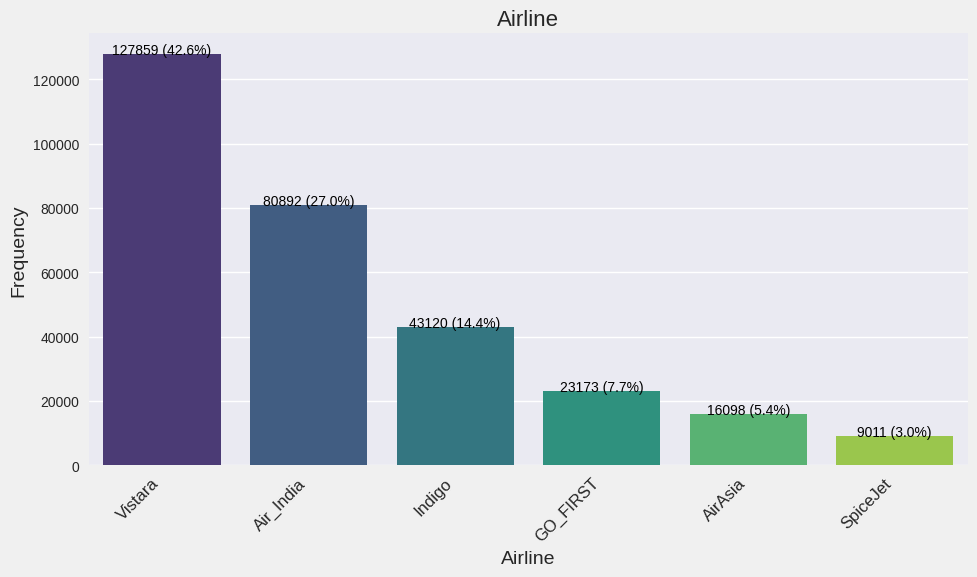

In [50]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')

ax = sns.barplot(x=freq_table.index, y="Frequency", data=freq_table, palette="viridis")
for i, (freq, perc) in enumerate(zip(freq_table['Frequency'], freq_table['Percent'])):
    ax.text(i, freq + 0.5, f'{freq} ({perc:.1f}%)', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Airline", fontsize=16)
plt.tight_layout()
plt.show()

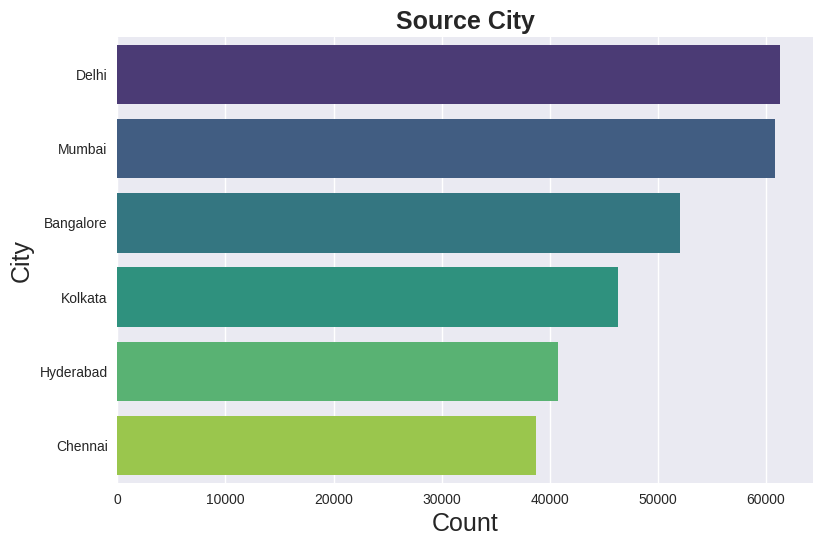

In [51]:
counts = df['source_city'].value_counts()
sns.barplot(y=counts.index,x=counts,palette='viridis')
plt.title('Source City',fontsize=18,fontweight='600')
plt.xlabel('Count',fontsize=18)
plt.ylabel('City',fontsize=18)
plt.show()

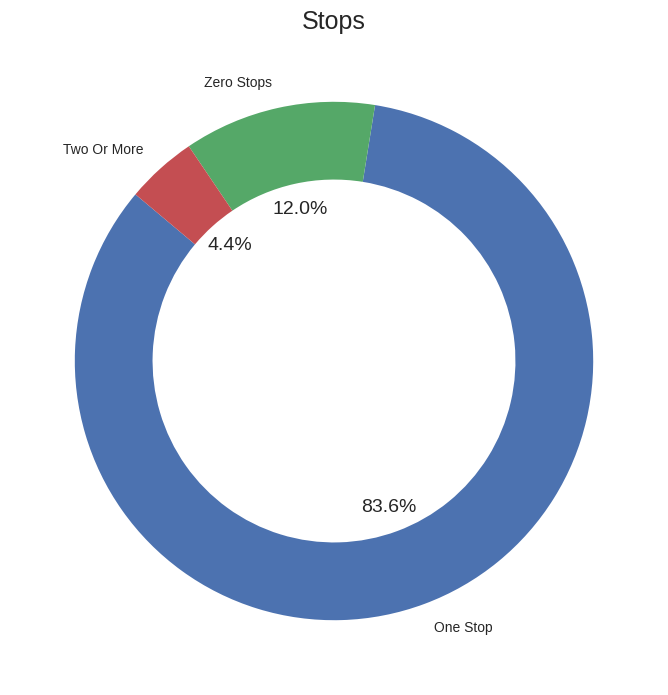

In [52]:
counts = df['stops'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['One Stop','Zero Stops','Two Or More'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))  
plt.title("Stops", fontsize=18)
plt.show()

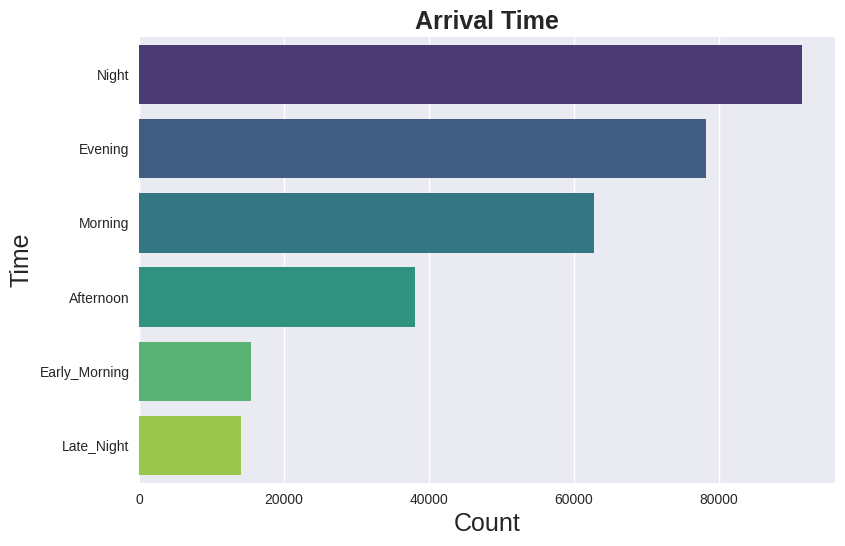

In [53]:
counts = df['arrival_time'].value_counts()
sns.barplot(y=counts.index,x=counts,palette='viridis')
plt.title('Arrival Time',fontsize=18,fontweight='600')
plt.xlabel('Count',fontsize=18)
plt.ylabel('Time',fontsize=18)
plt.show()

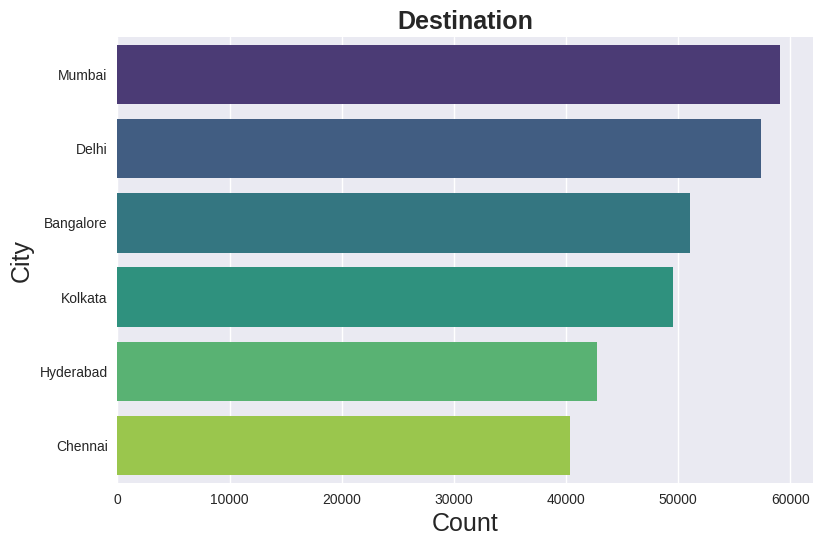

In [54]:
counts = df['destination_city'].value_counts()
sns.barplot(y=counts.index,x=counts,palette='viridis')
plt.title('Destination',fontsize=18,fontweight='600')
plt.xlabel('Count',fontsize=18)
plt.ylabel('City',fontsize=18)
plt.show()

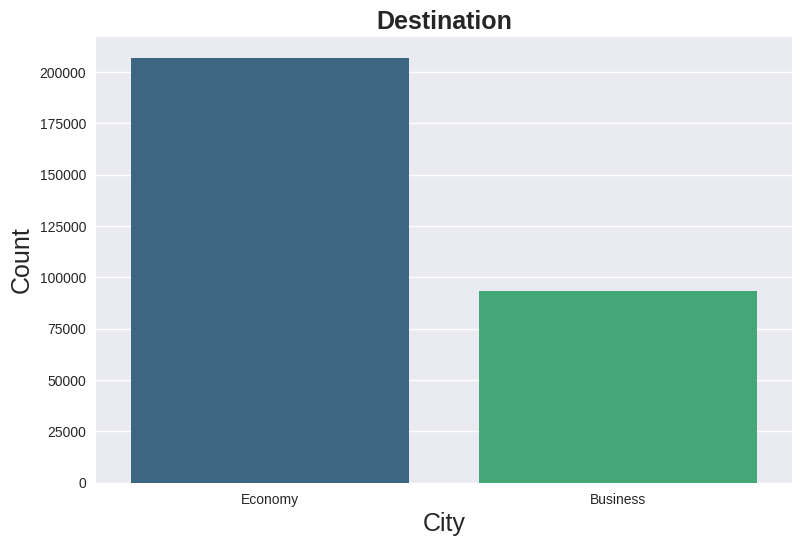

In [55]:
counts = df['class'].value_counts()
sns.barplot(x=counts.index,y=counts,palette='viridis')
plt.title('Destination',fontsize=18,fontweight='600')
plt.ylabel('Count',fontsize=18)
plt.xlabel('City',fontsize=18)
plt.show()

In [56]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

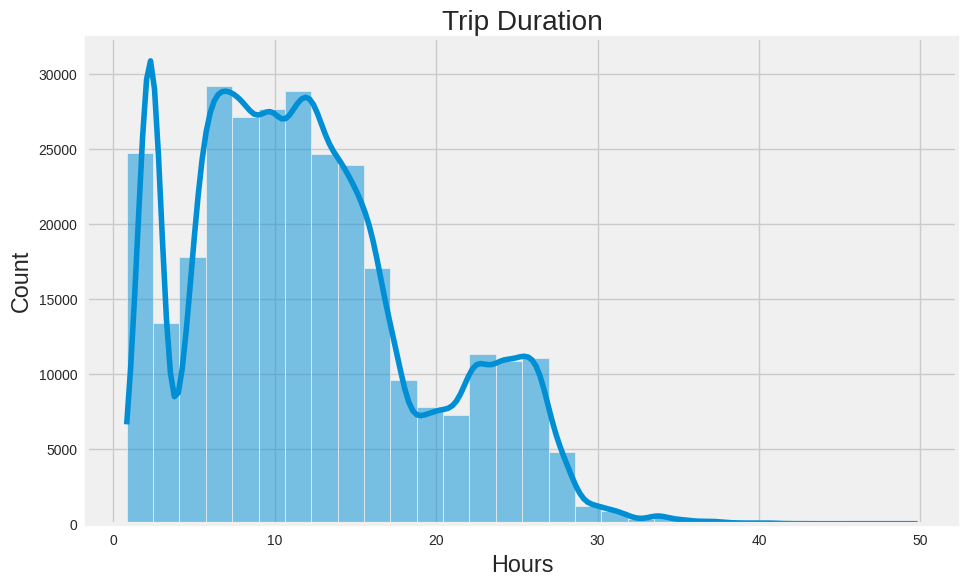

In [57]:
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Trip Duration')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

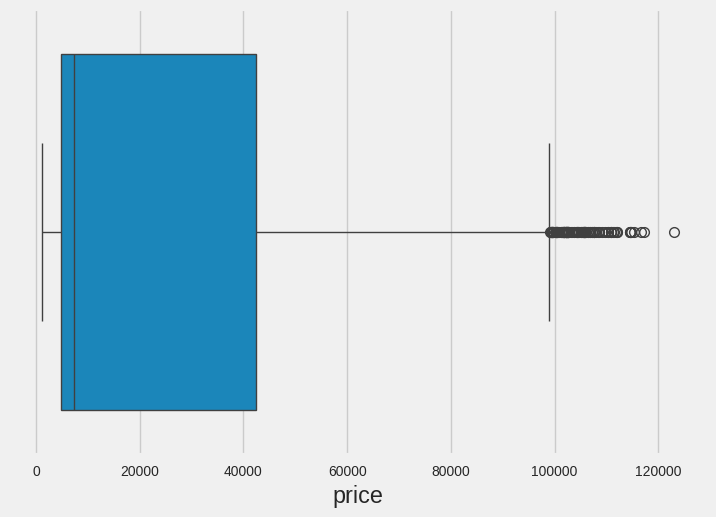

In [58]:
sns.boxplot(x=df['price'])
plt.show()

In [63]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


In [64]:
outliers['class'].value_counts()

class
Business    123
Name: count, dtype: int64

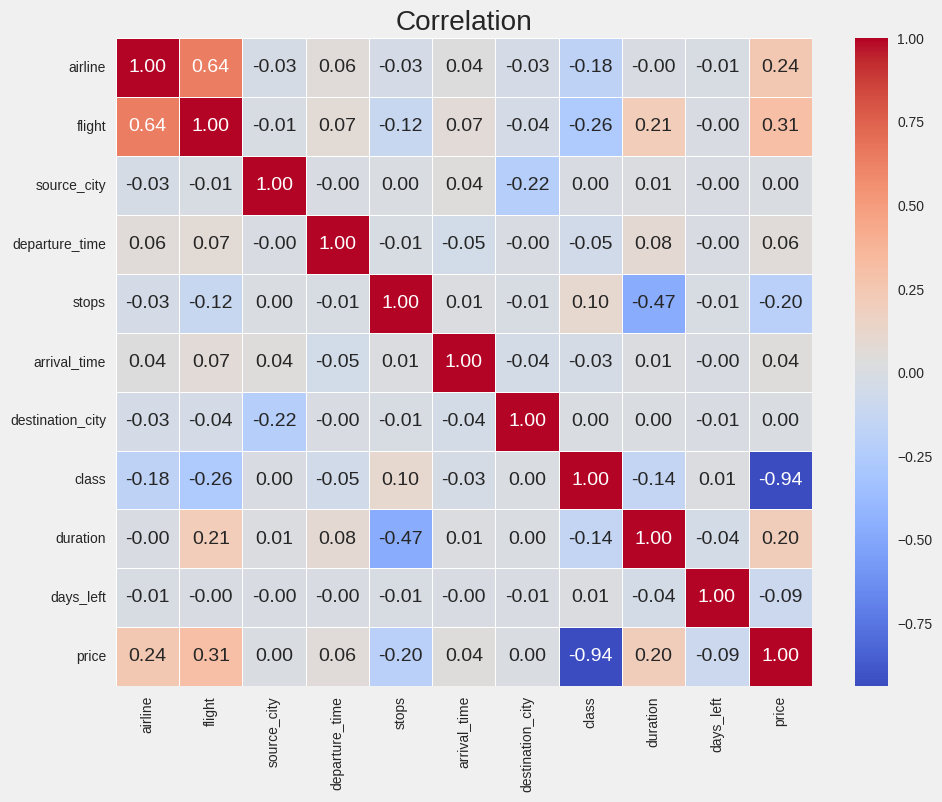

In [66]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()